In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from env import *
from wrangle import *

### Wrangle Data

In [ ]:
df = wrangle_zillow()

### Split Data

In [4]:
train, val, test = split_data(df)

### Plot Variable Pairs + Regression Line

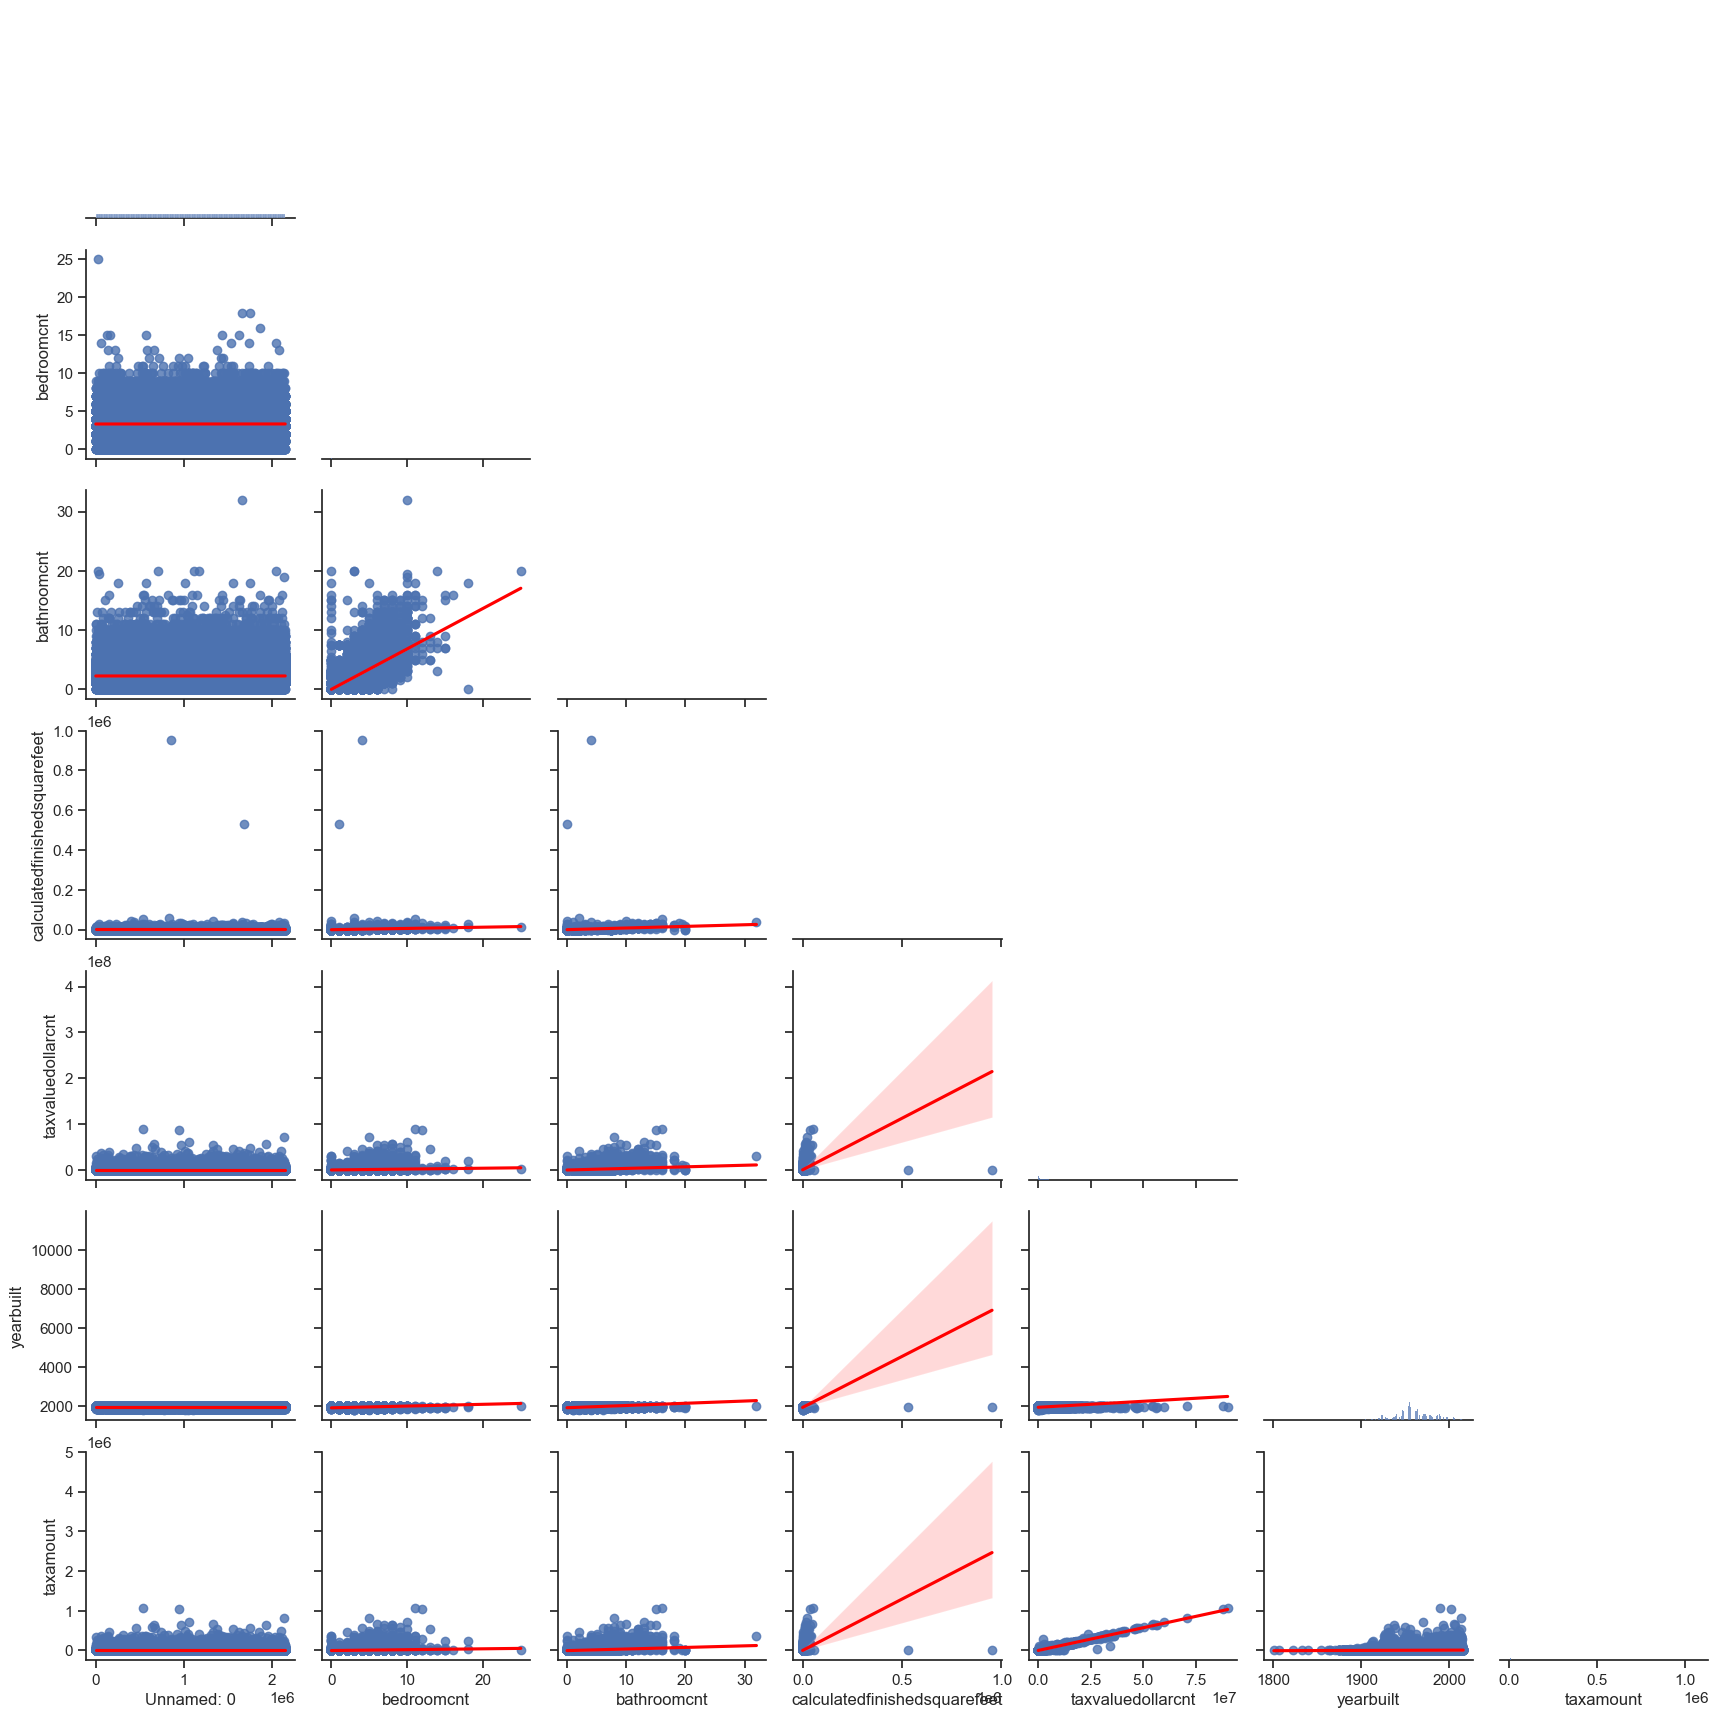

In [10]:
g = sns.pairplot(train, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})

### 3.

### `function()`
### Plot Variable Pairs + Regression Line

In [4]:
def plot_variable_pairs(df):
    sns.set(style="ticks", color_codes=True)
    plot = sns.pairplot(df, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})
    plt.show()

In [ ]:
plot_variable_pairs(train)

### 4. 
### `function()`
### Plot Categorical & Continuous

In [ ]:
def plot_categorical_and_continuous_vars():


In [ ]:
sns.boxplot(x=discrete_var, y=continuous_var, data=train)
sns.violinplot(x=discrete_var, y=continuous_var, data=train)
sns.barplot(x=discrete_var, y=continuous_var, data=train)

In [6]:
continuous_var = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']
discrete_var = ['fips']

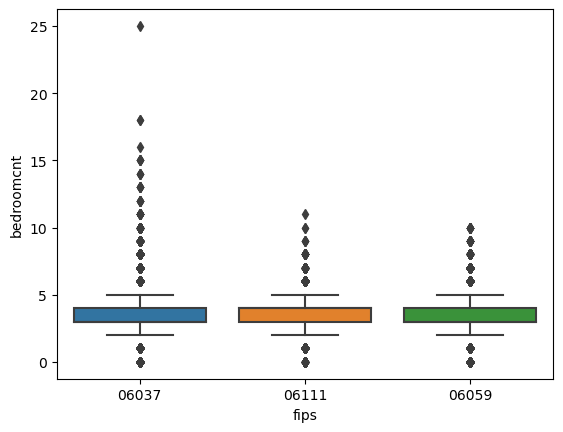

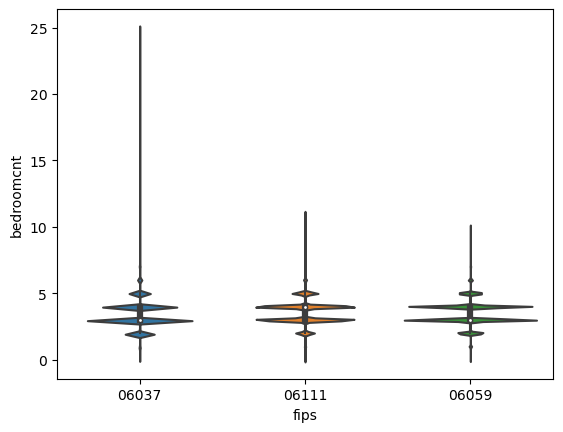

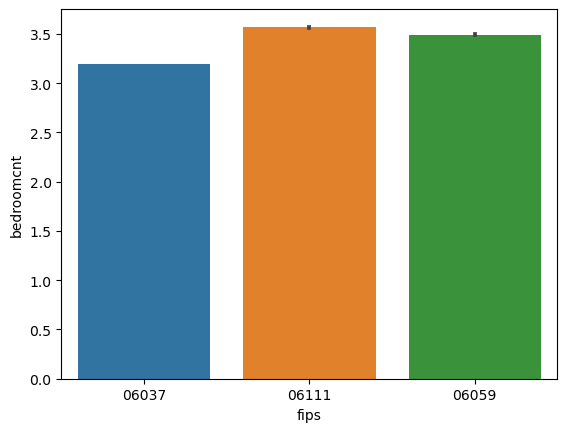

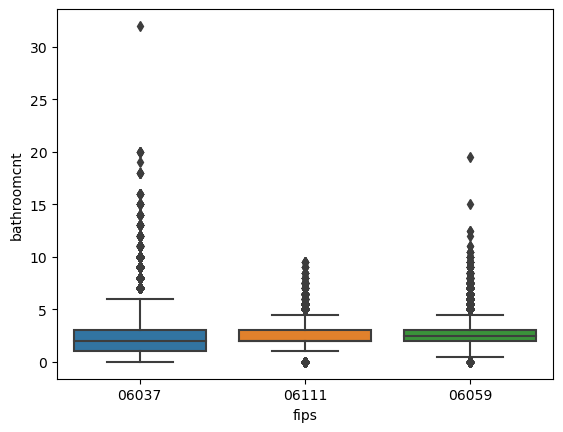

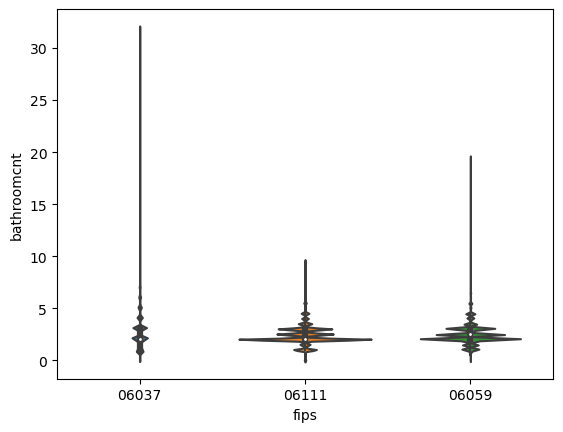

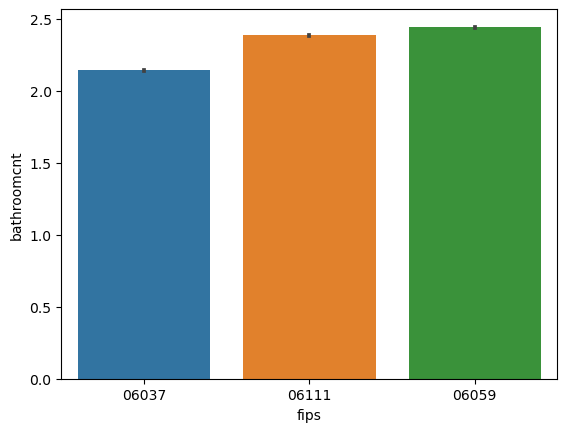

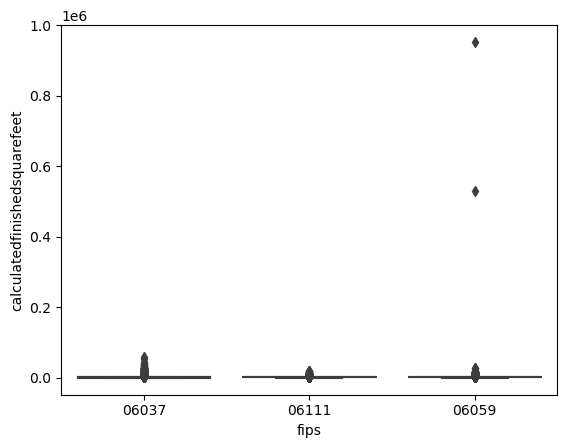

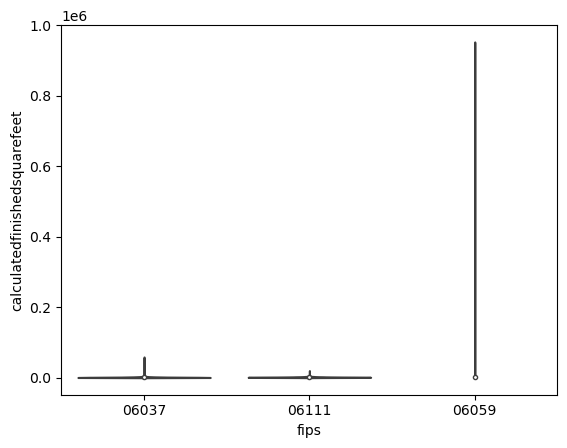

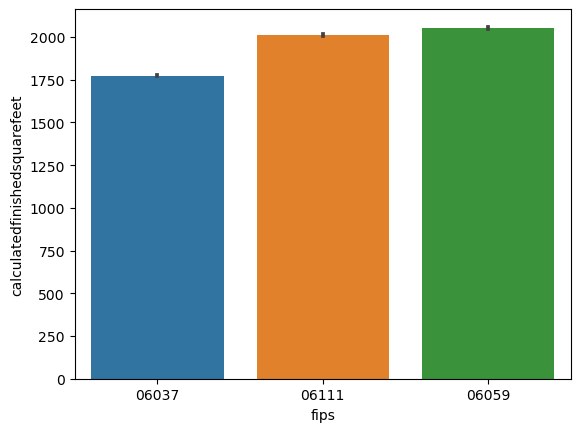

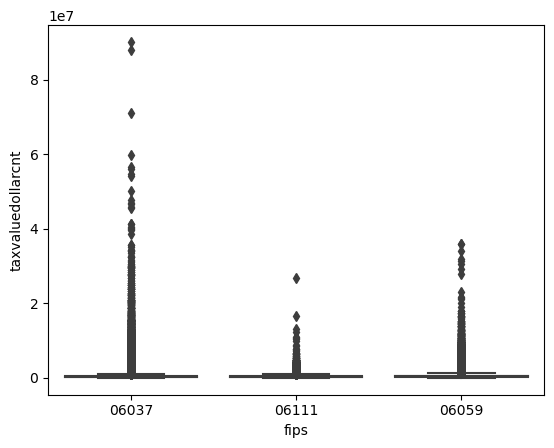

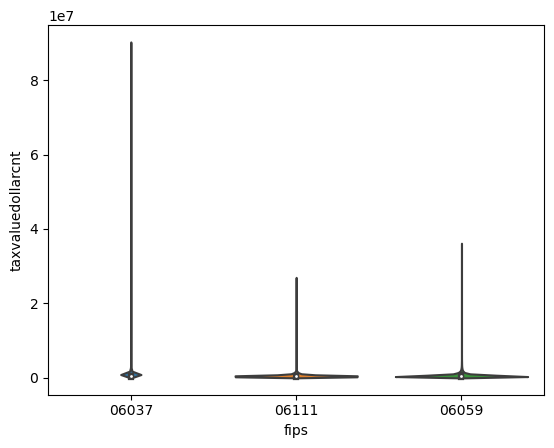

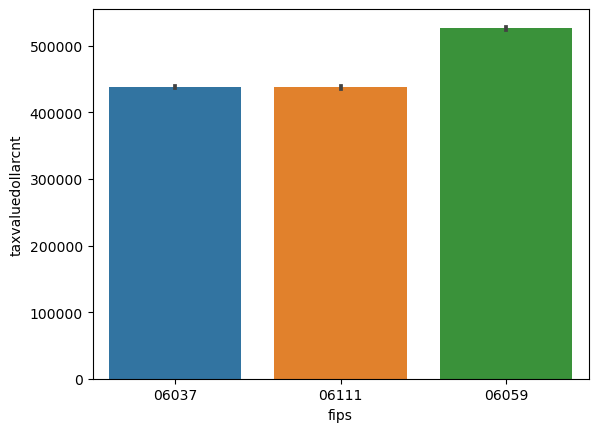

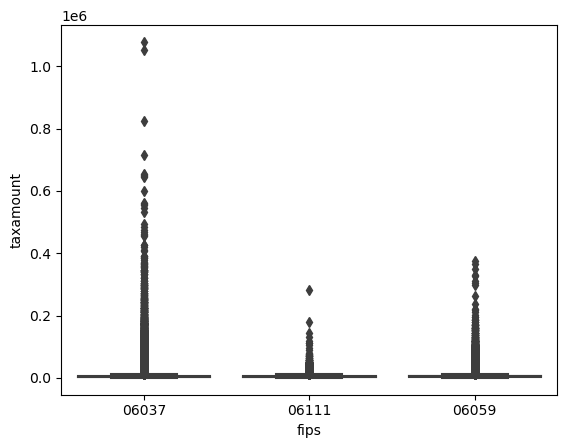

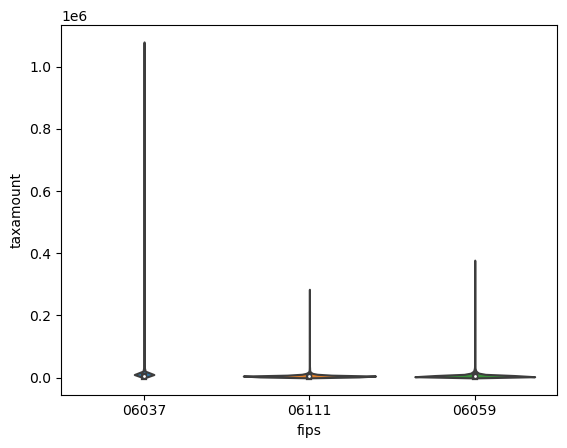

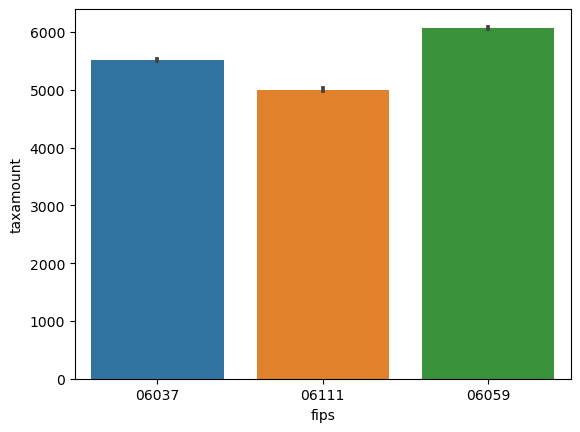

In [7]:
for discrete in discrete_var:
    for continous in continuous_var:
        sns.boxplot(x=discrete, y=continous, data=train)
        plt.show()
        
        sns.violinplot(x=discrete, y=continous, data=train)
        plt.show()
        
        sns.barplot(x=discrete, y=continous, data=train)
        plt.show()

### Save to
### `explore.py`

### 7.
### Initial hypotheses based on your goal of predicting property value?

H_0: There is no realtionship bewttween year built and property value
    
H_A: There is
    
Fialed to reject
Reject Null

(bedrooms, sqft, bathrooms,)

### 8.
### Visualize all combinations of variables?

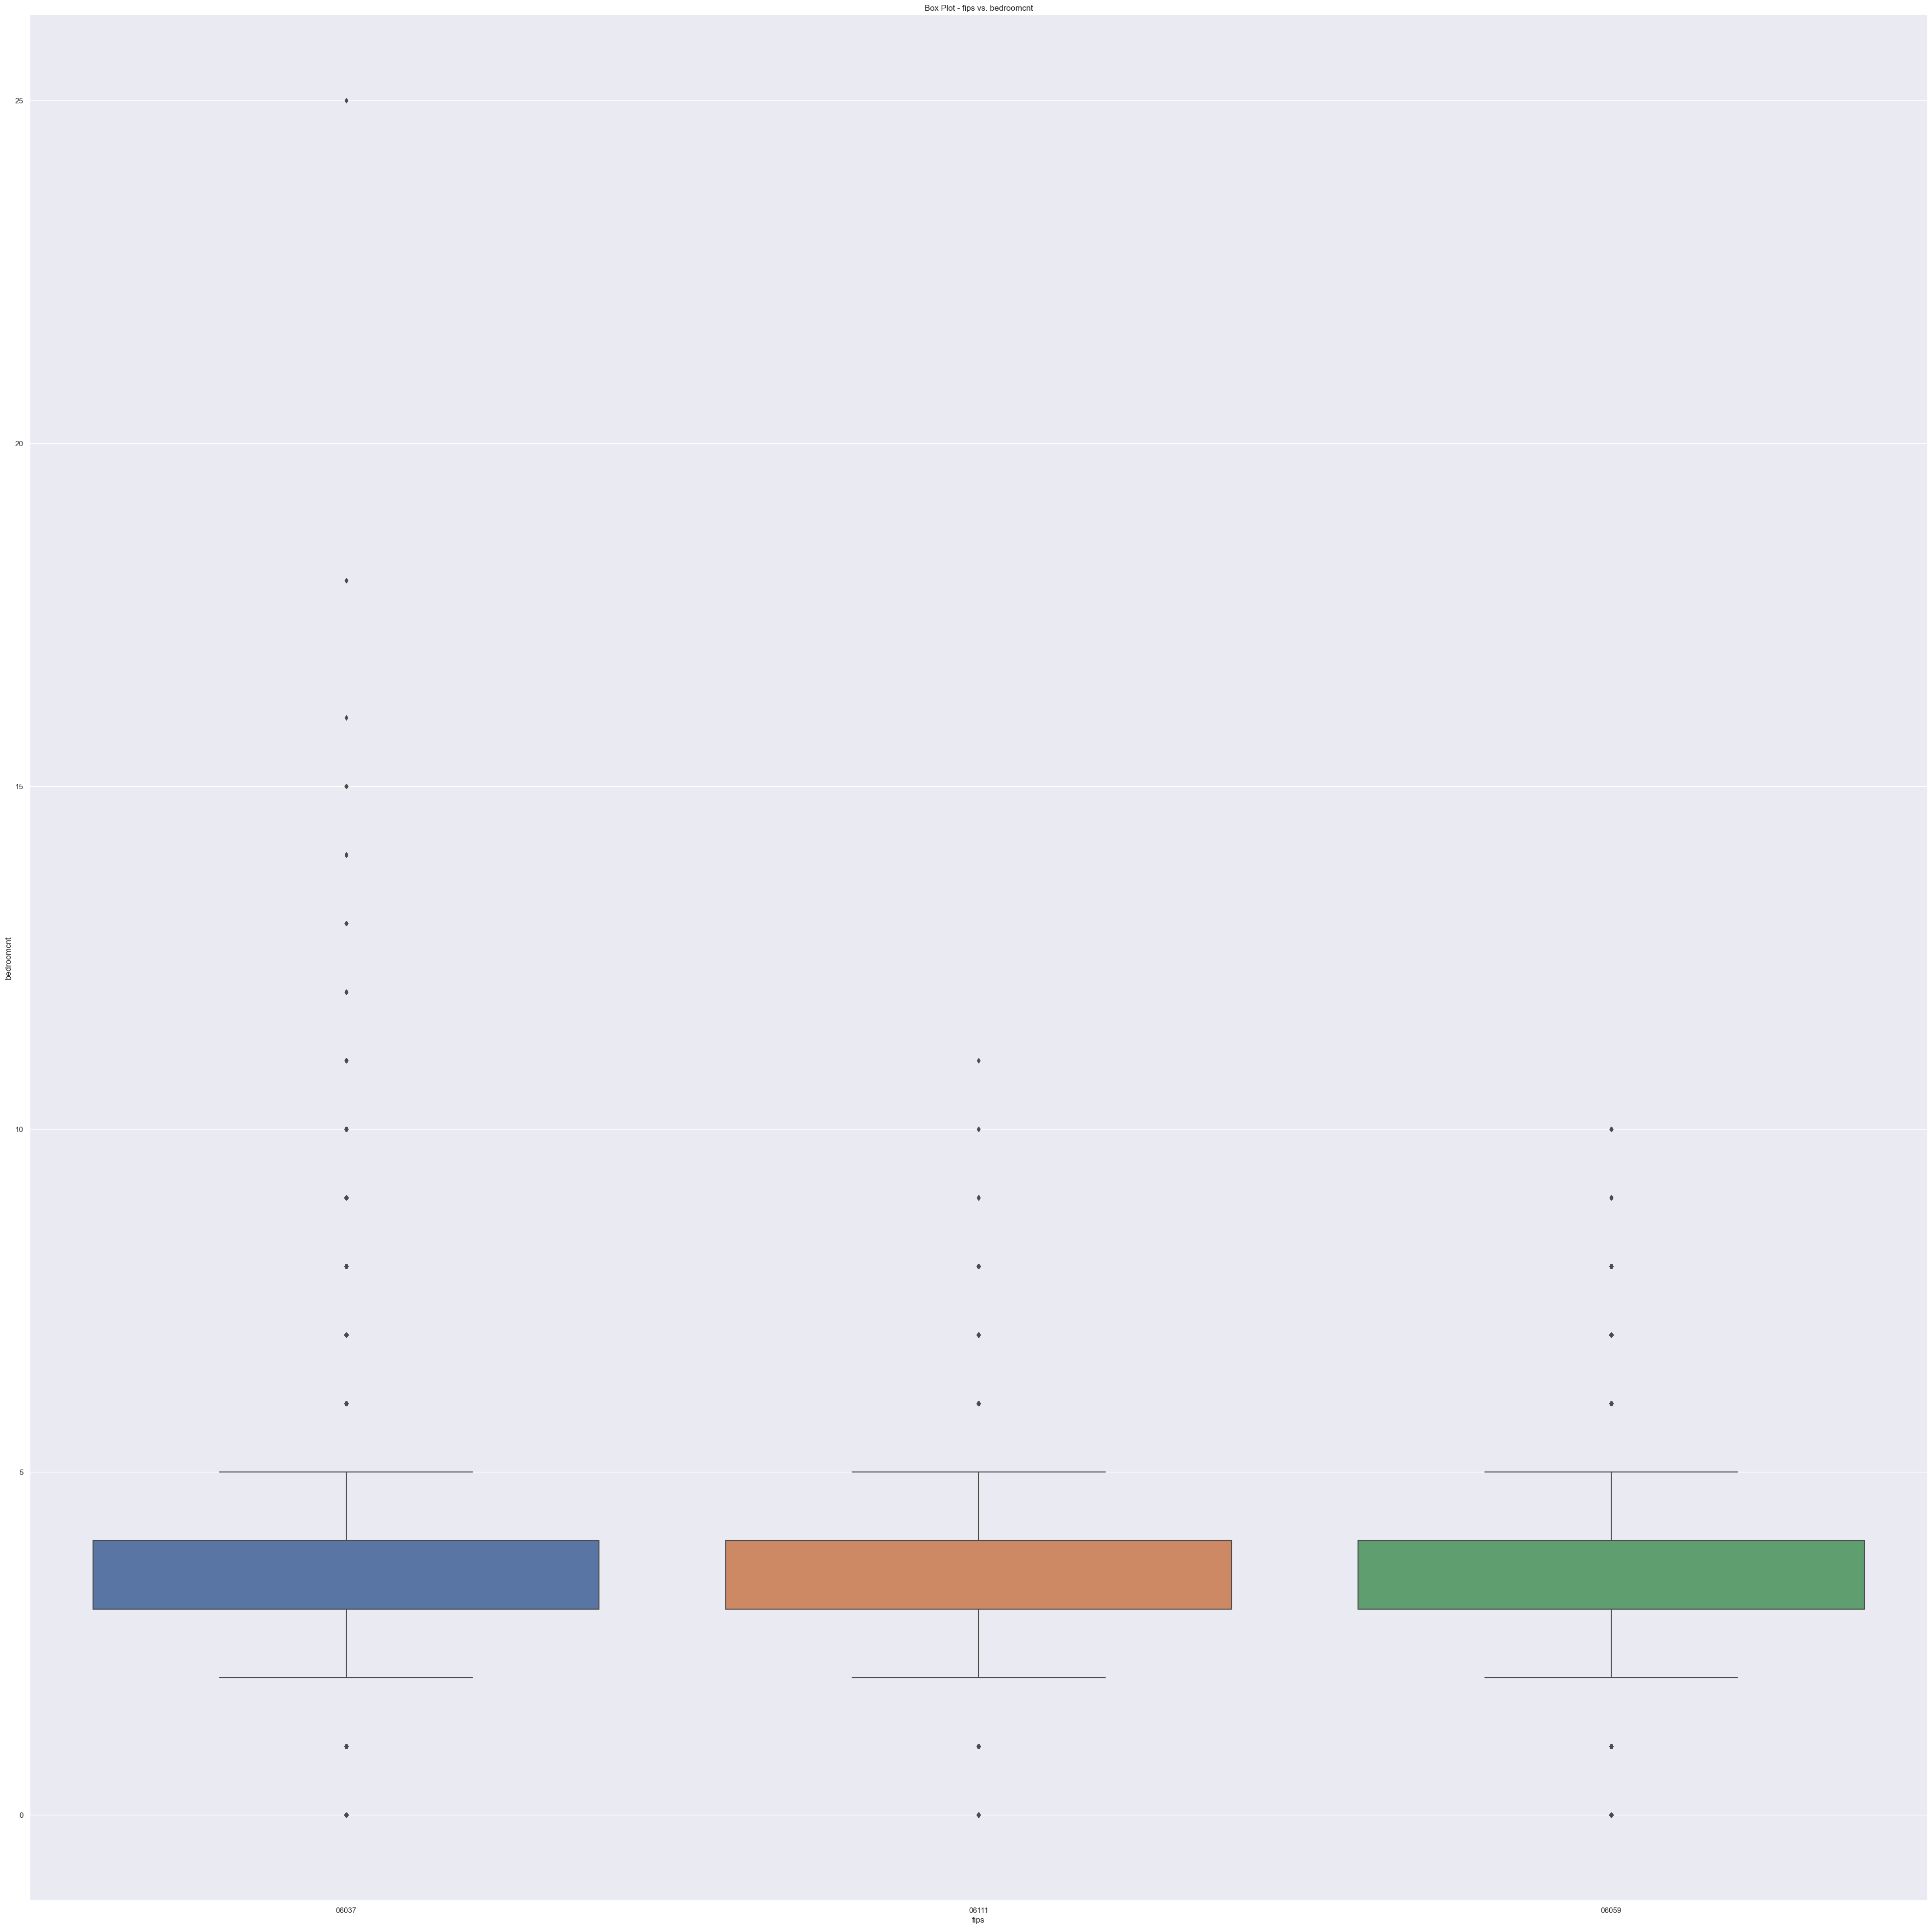

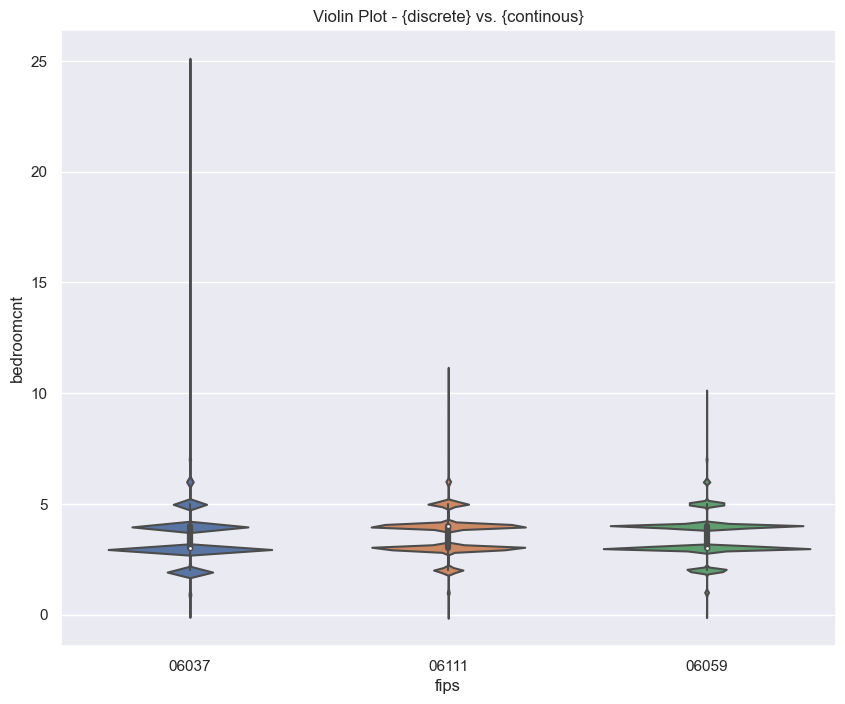

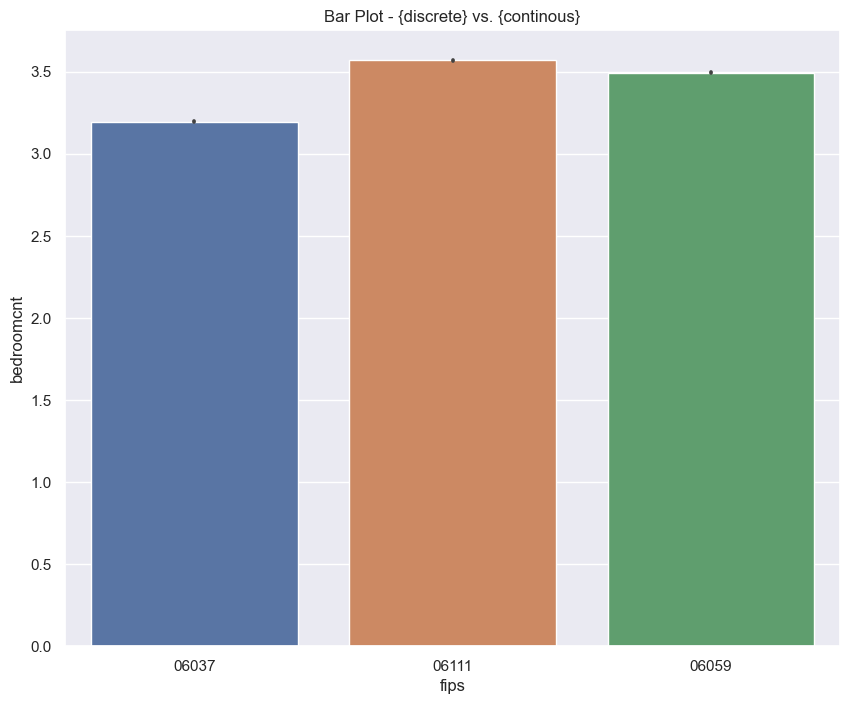

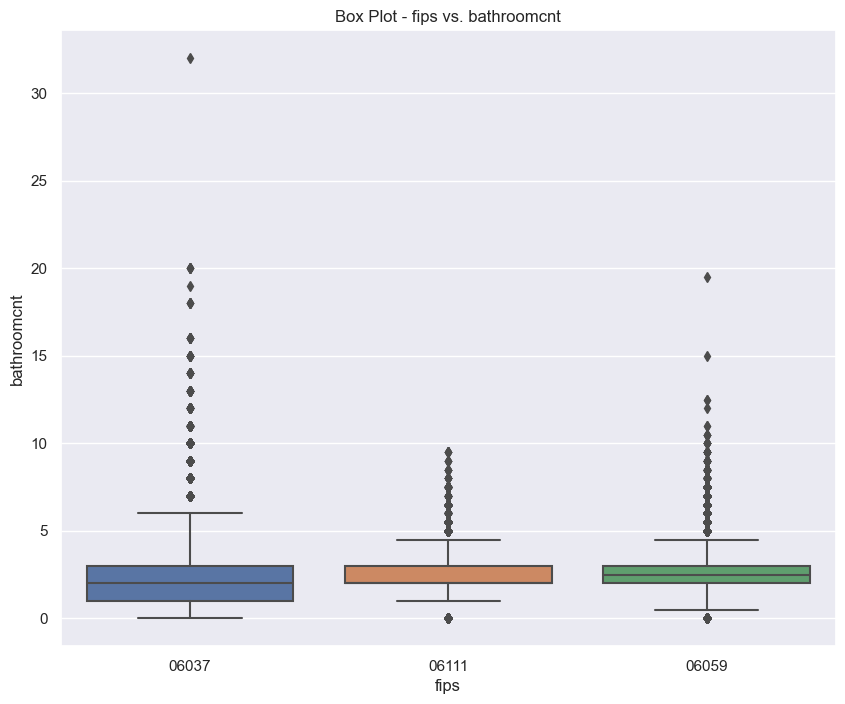

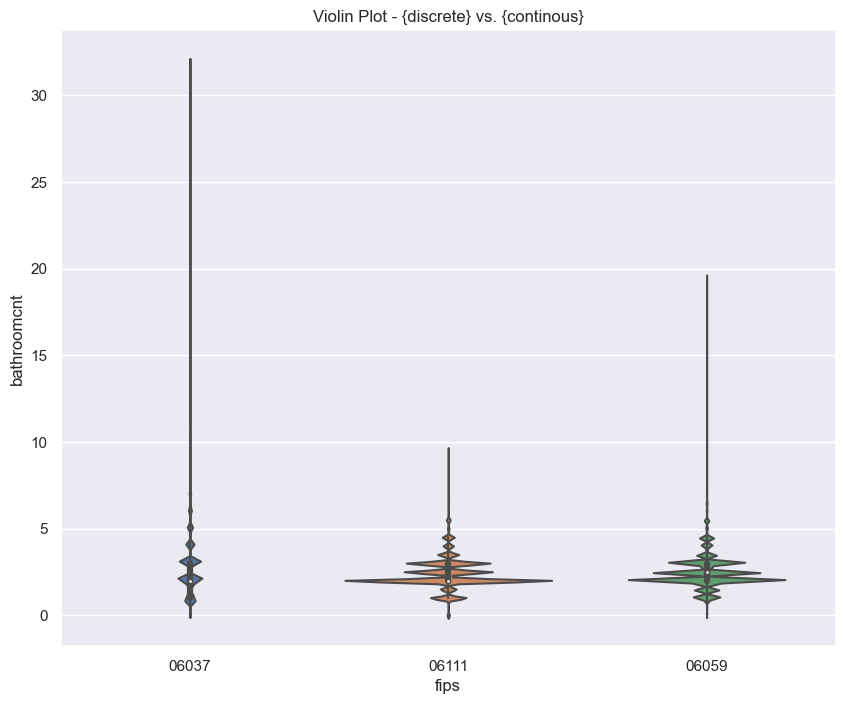

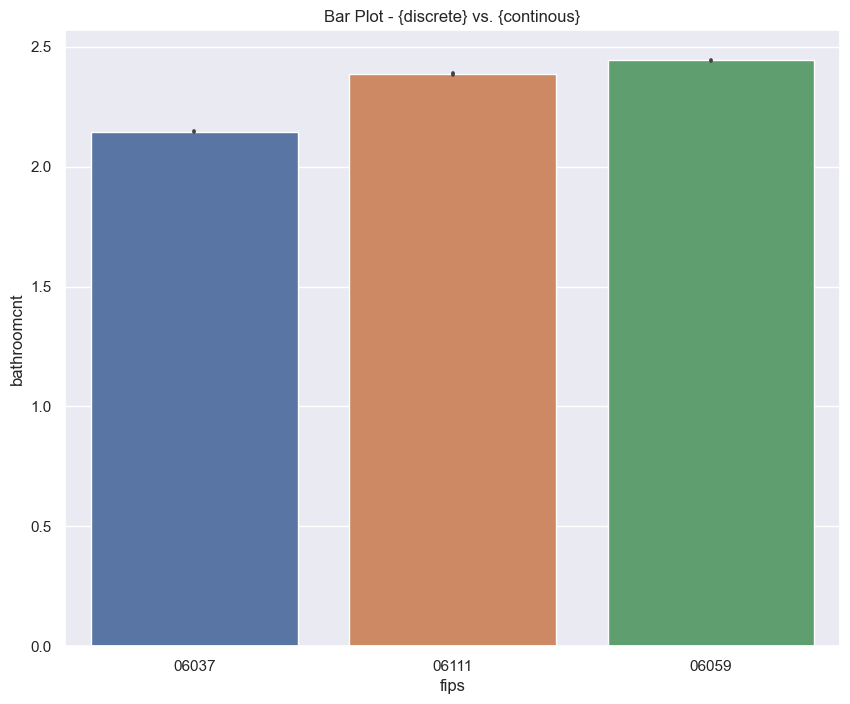

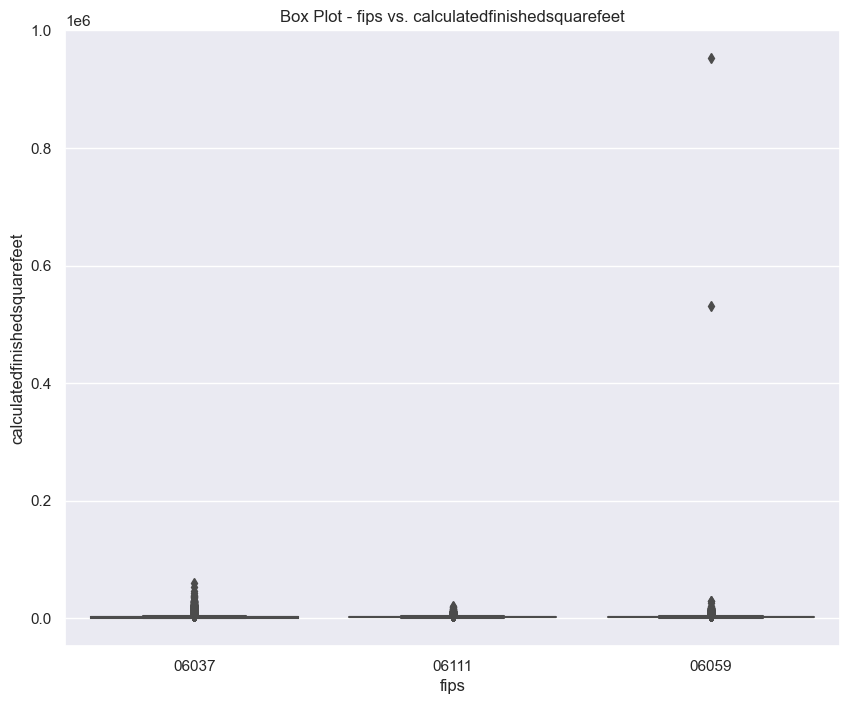

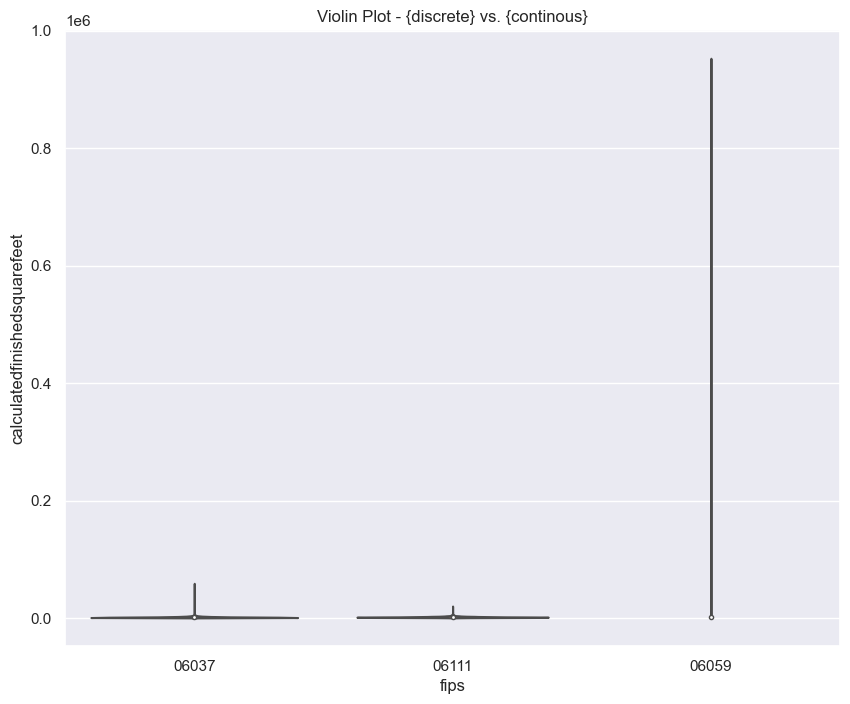

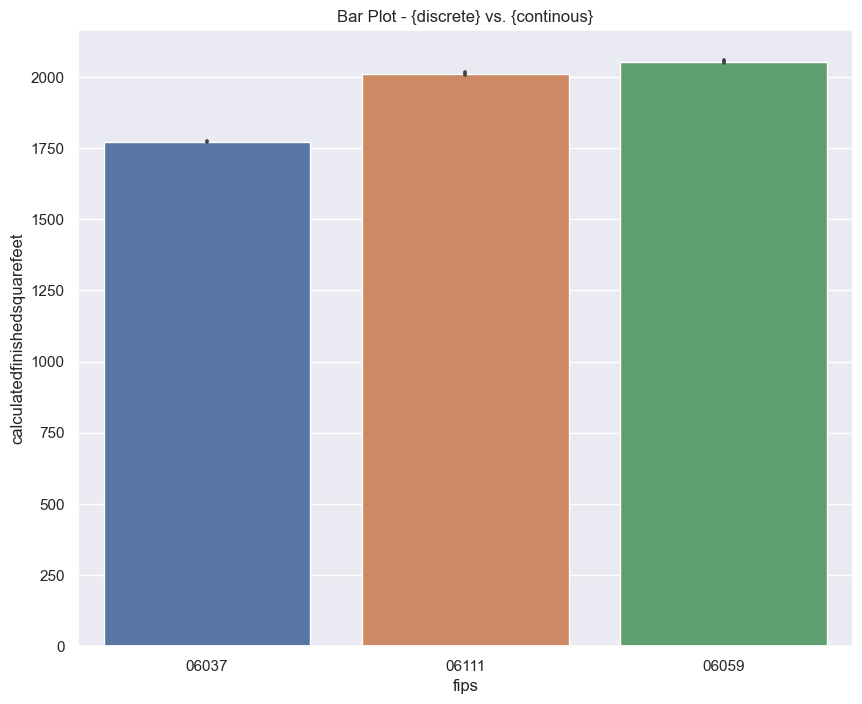

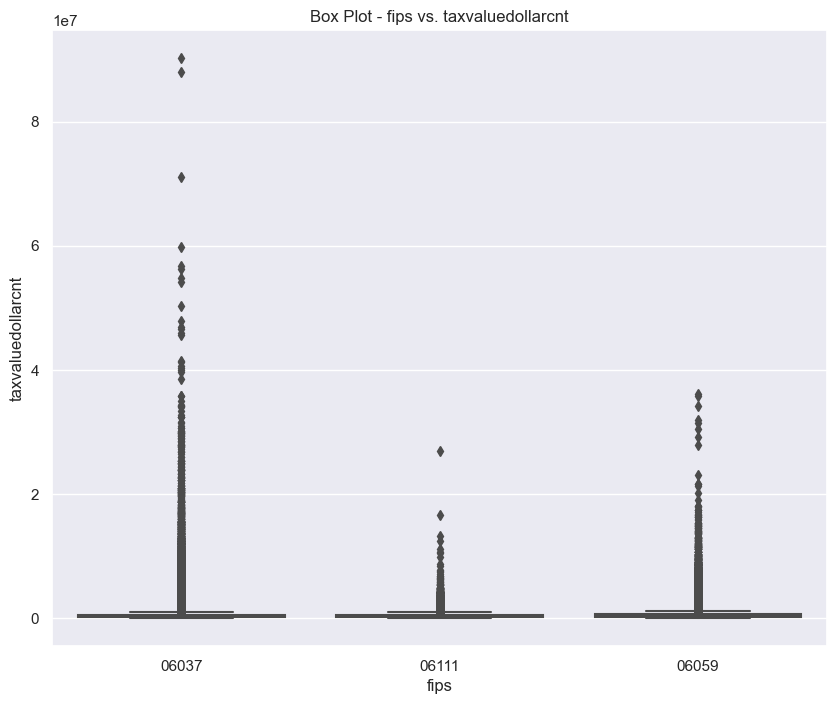

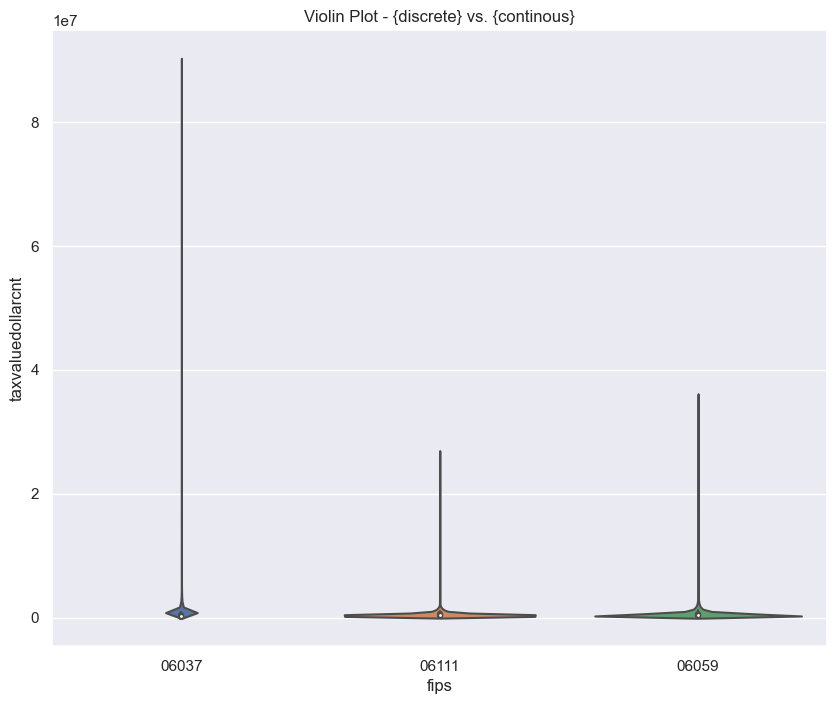

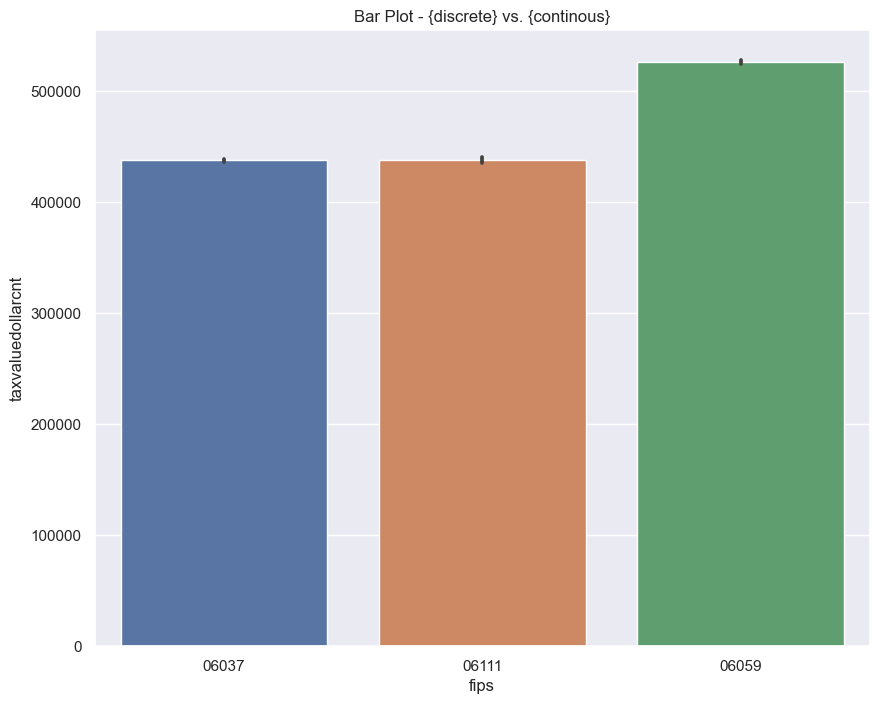

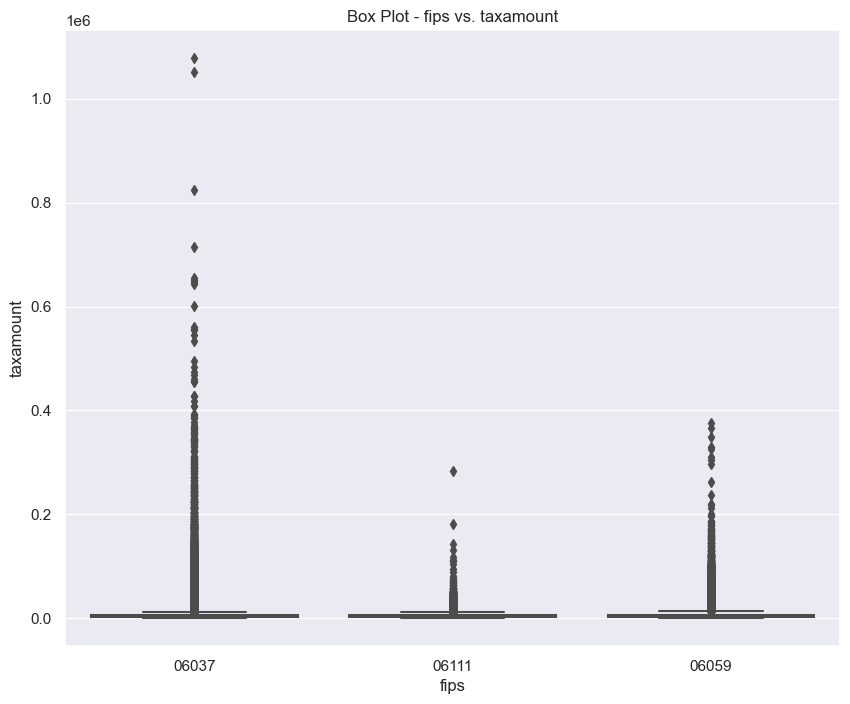

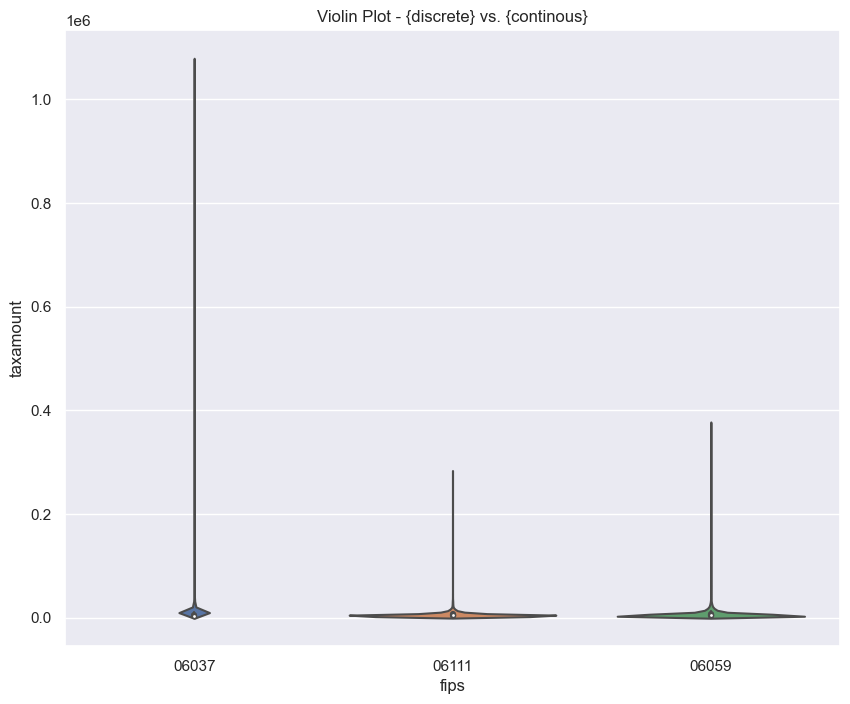

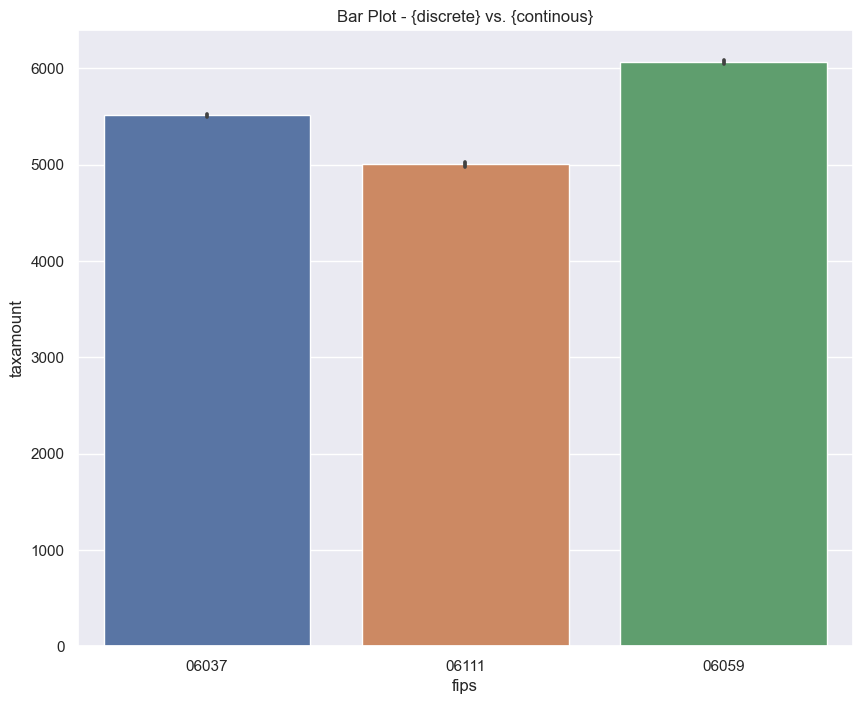

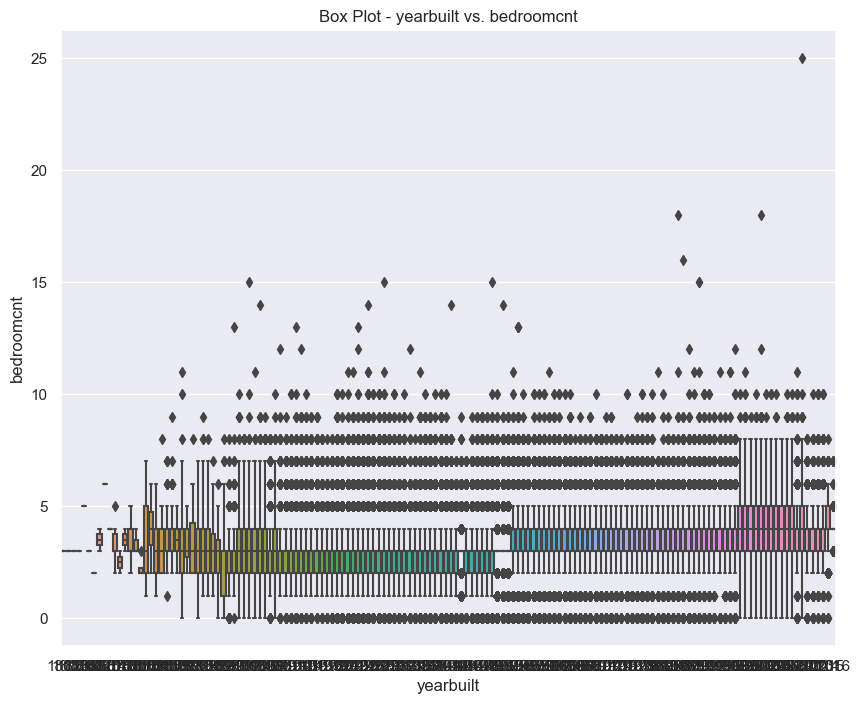

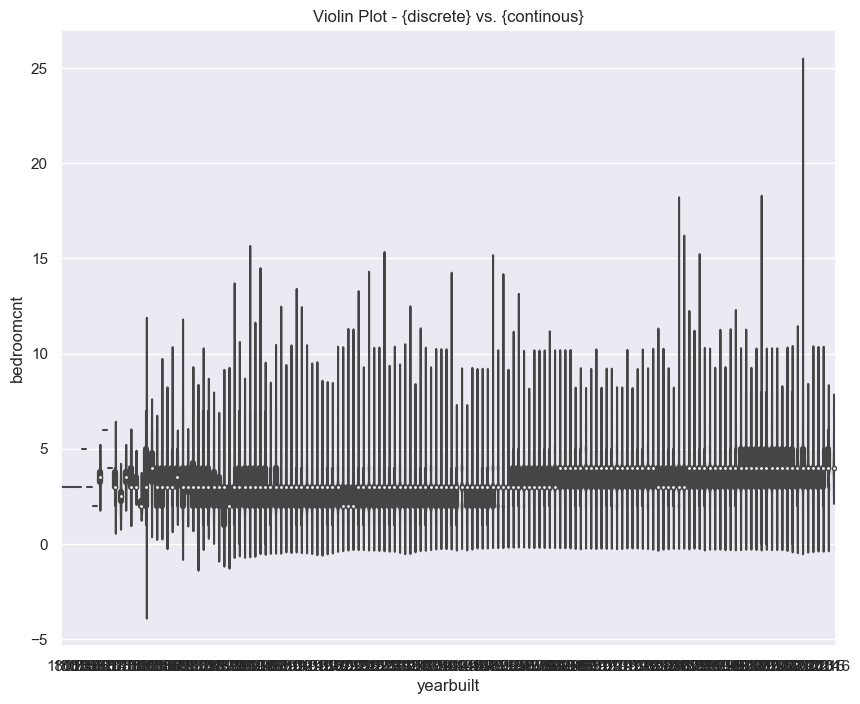

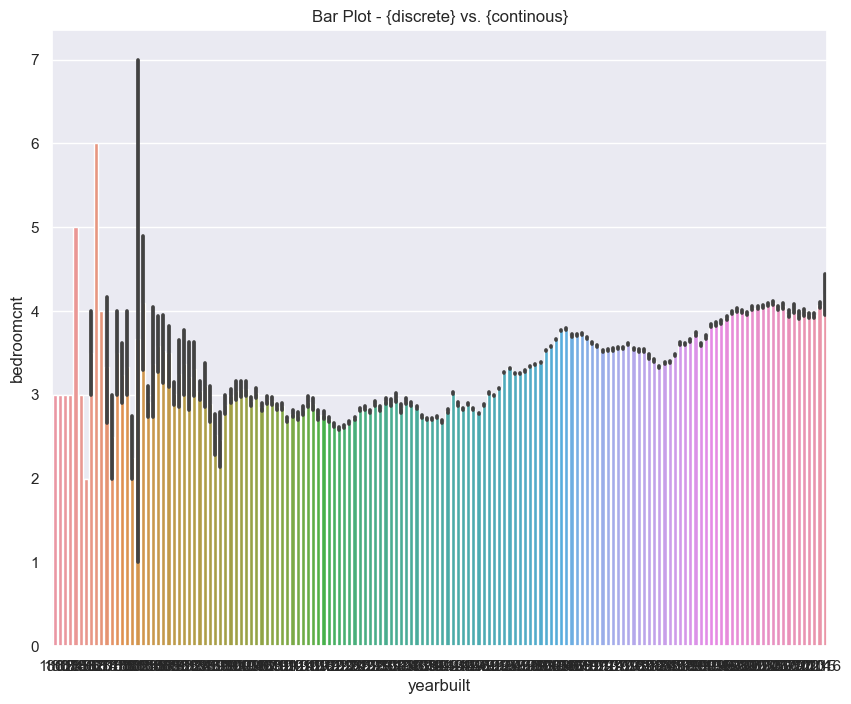

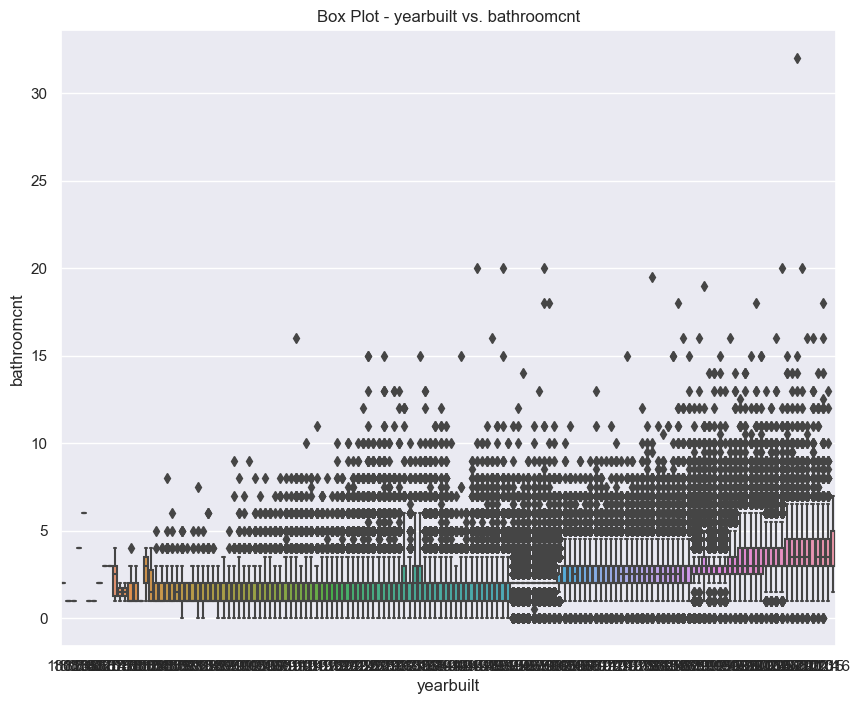

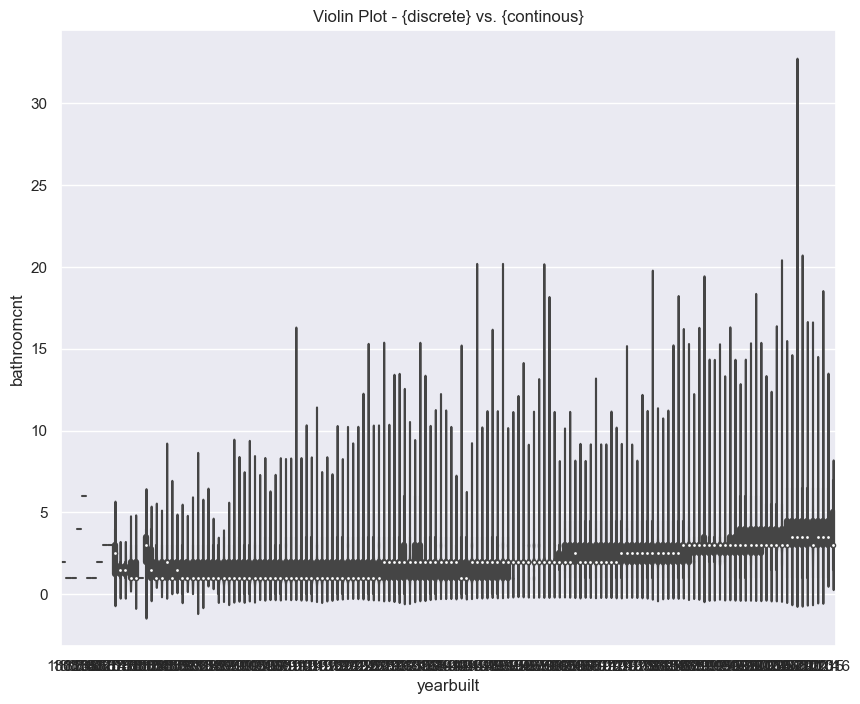

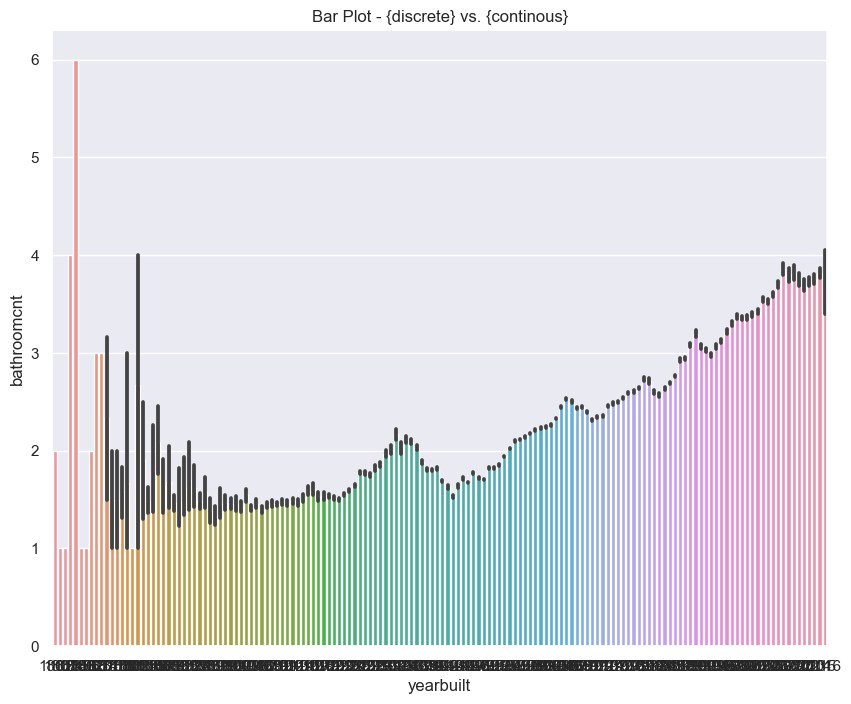

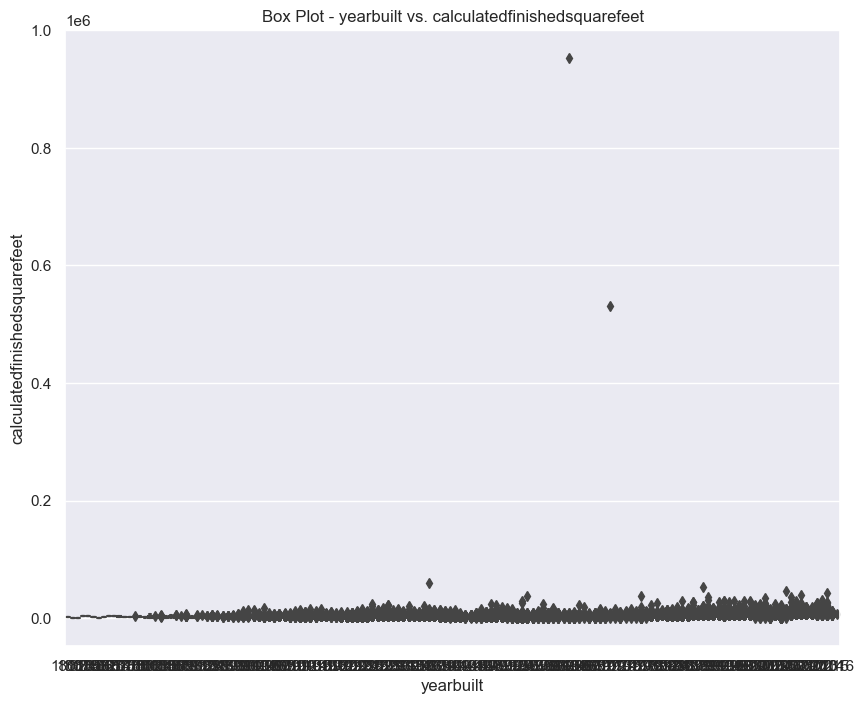

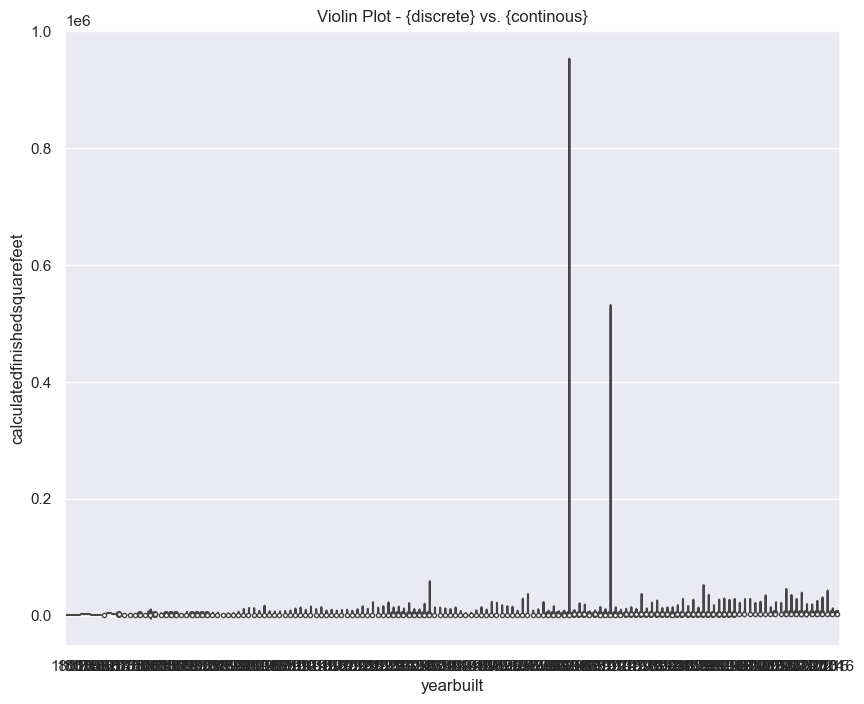

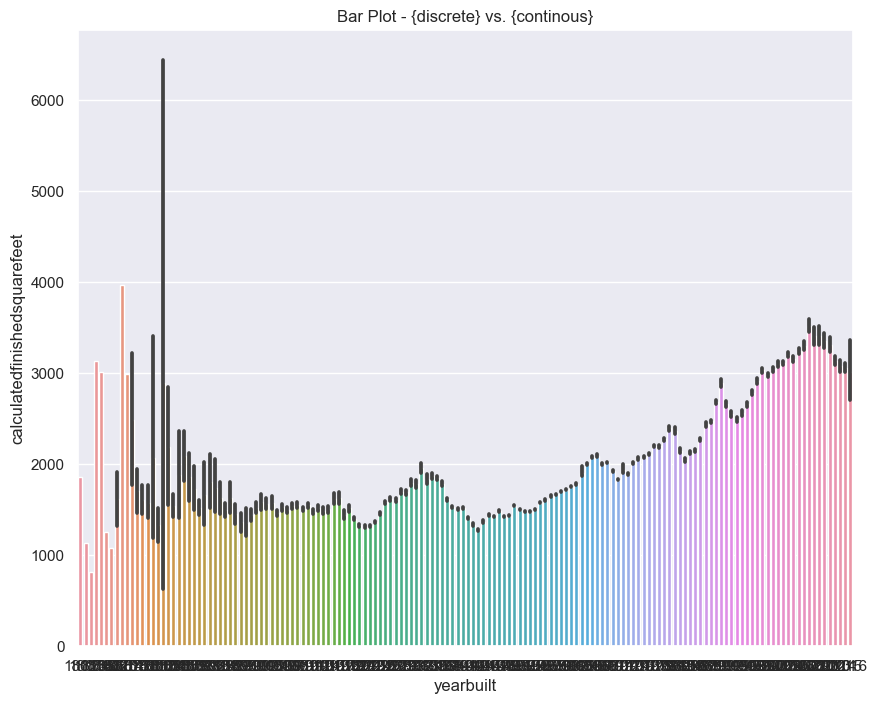

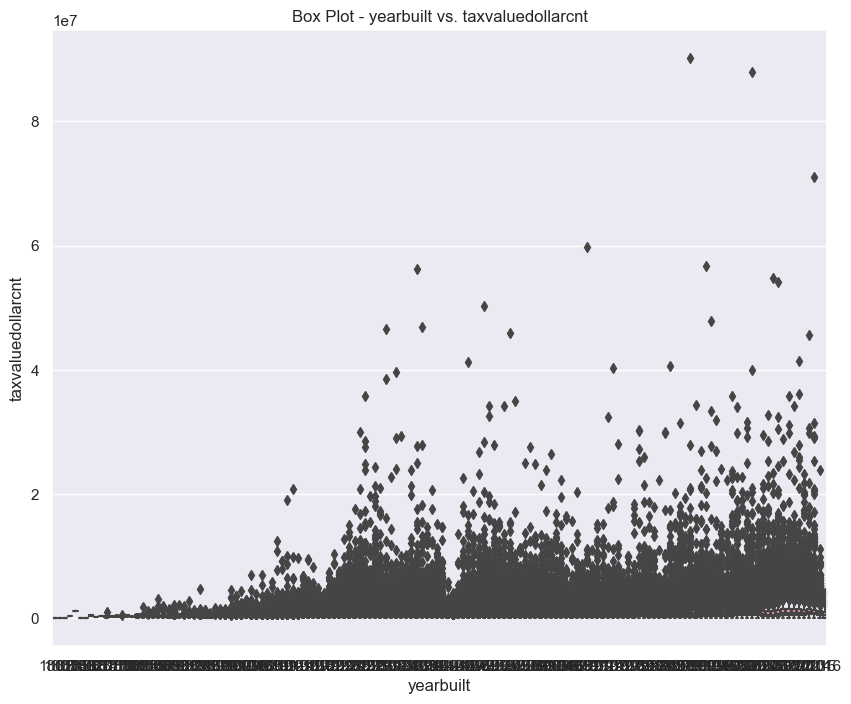

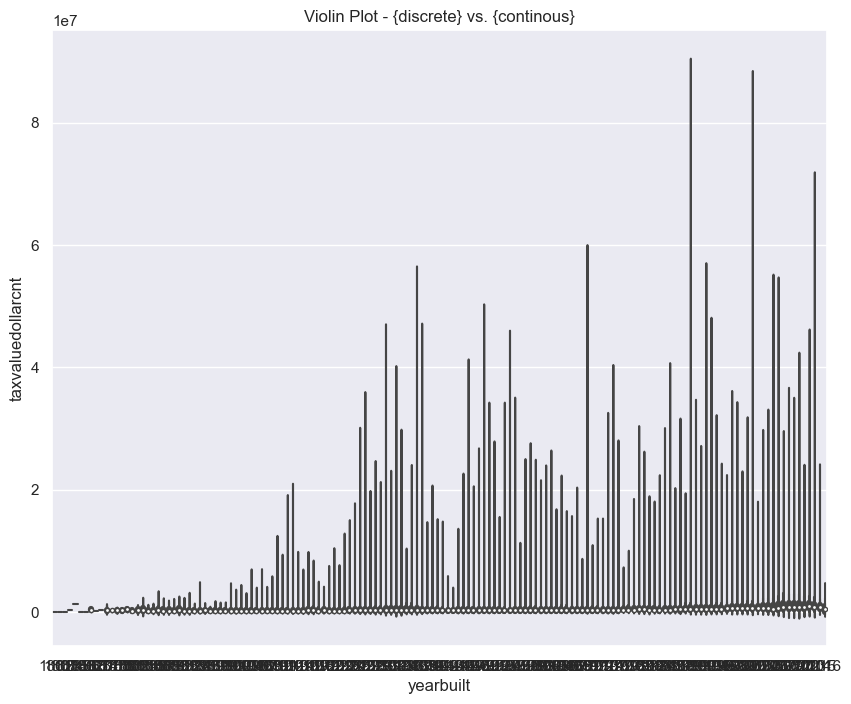

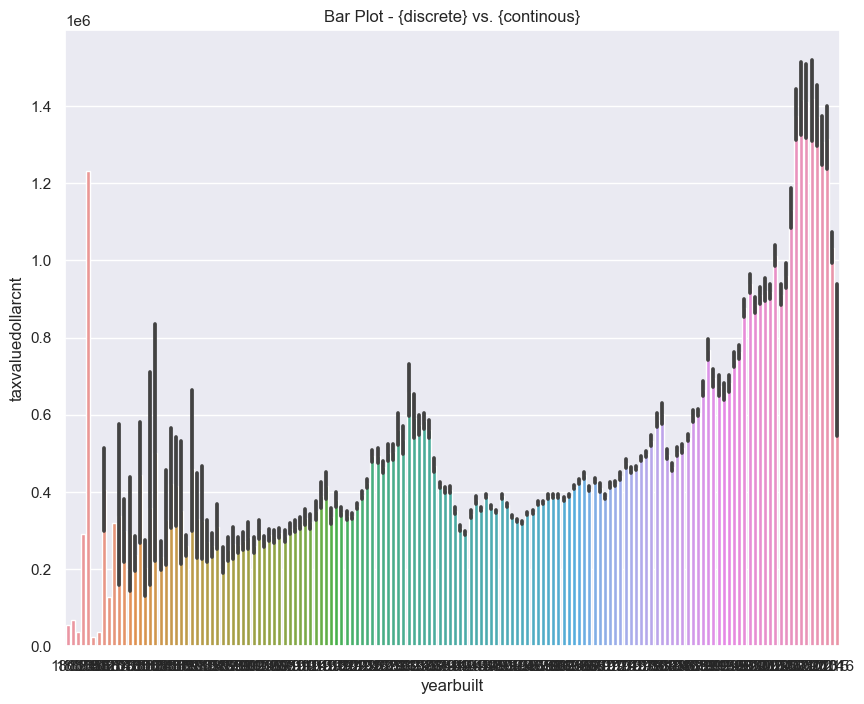

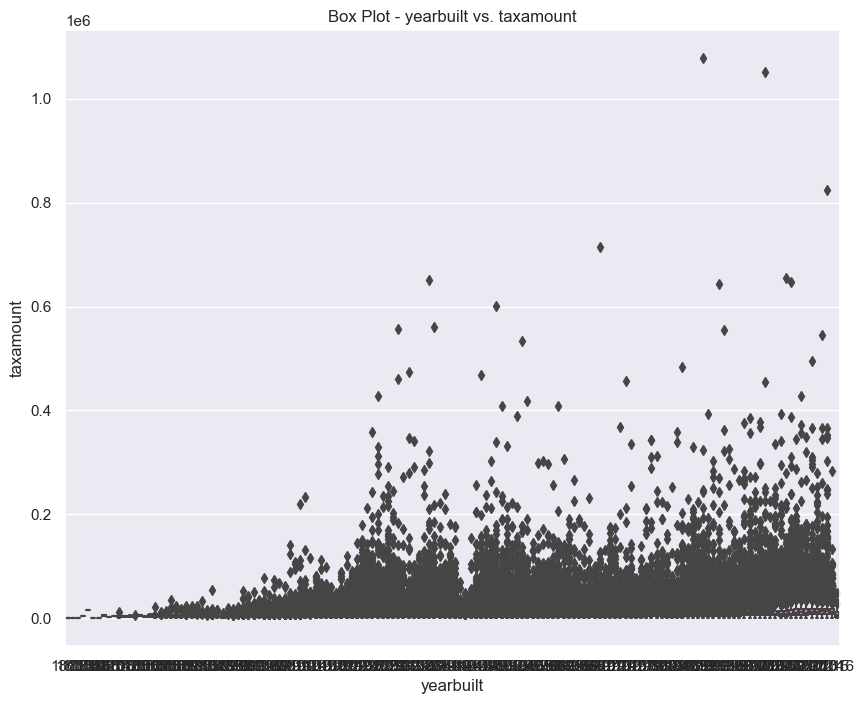

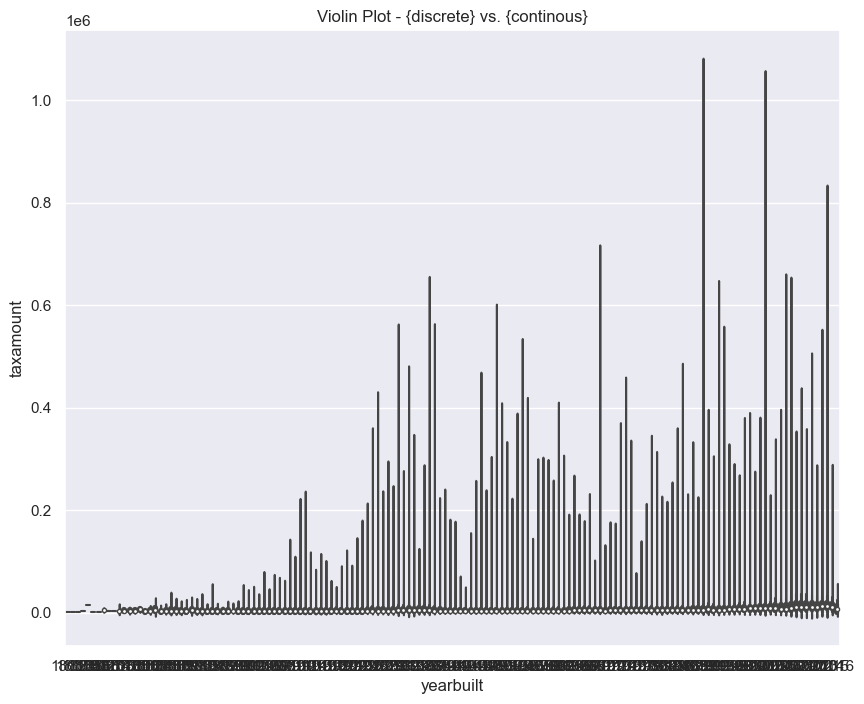

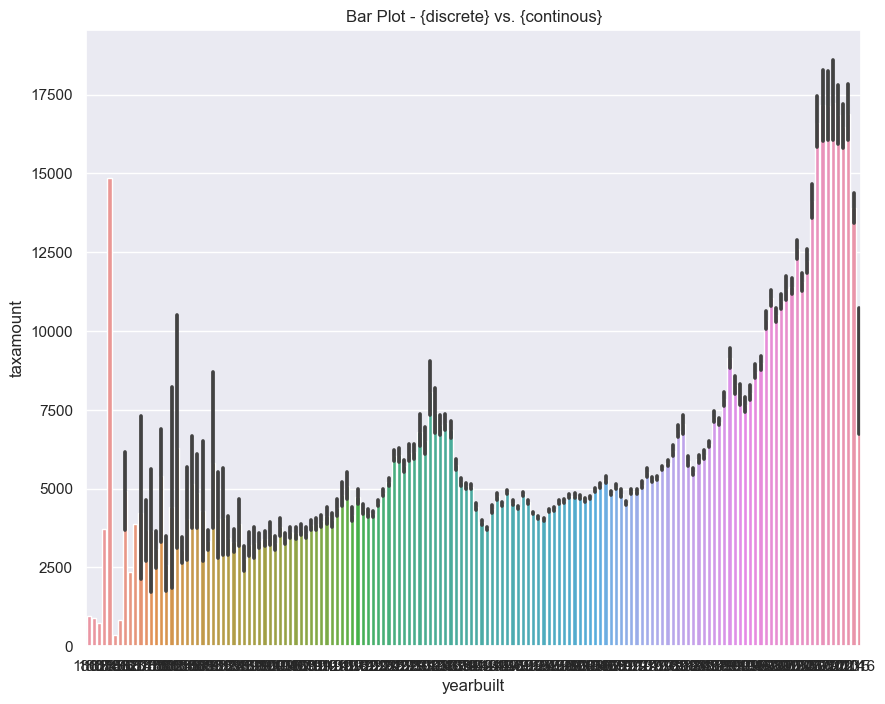

In [153]:
for discrete in discrete_var:
    for continous in continuous_var:
        sns.boxplot(x=discrete, y=continous, data=train)
        plt.title(f"Box Plot - {discrete} vs. {continous}")
        plt.rcParams["figure.figsize"] = (10,8)
        plt.show()
        
        sns.violinplot(x=discrete, y=continous, data=train)
        plt.title(f"Violin Plot - {discrete} vs. {continous}")
        plt.rcParams["figure.figsize"] = (10,8)
        plt.show()
        
        sns.barplot(x=discrete, y=continous, data=train)
        plt.title(f"Bar Plot - {discrete} vs. {continous}")
        plt.rcParams["figure.figsize"] = (10,8)
        plt.show()

In [37]:
train['quantiles']= pd.qcut(test['yearbuilt'], q=20, precision=0)

In [38]:
train.columns

Index(['Unnamed: 0', 'bedroomcnt', 'bathroomcnt',
       'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount', 'fips', 'propertylandusedesc', 'quantiles'],
      dtype='object')

In [ ]:
correlations = train_corr.corr(method = 'spearman')
correlations

In [ ]:
r, p_value = pearsonr(train.exam1, train.final_grade)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

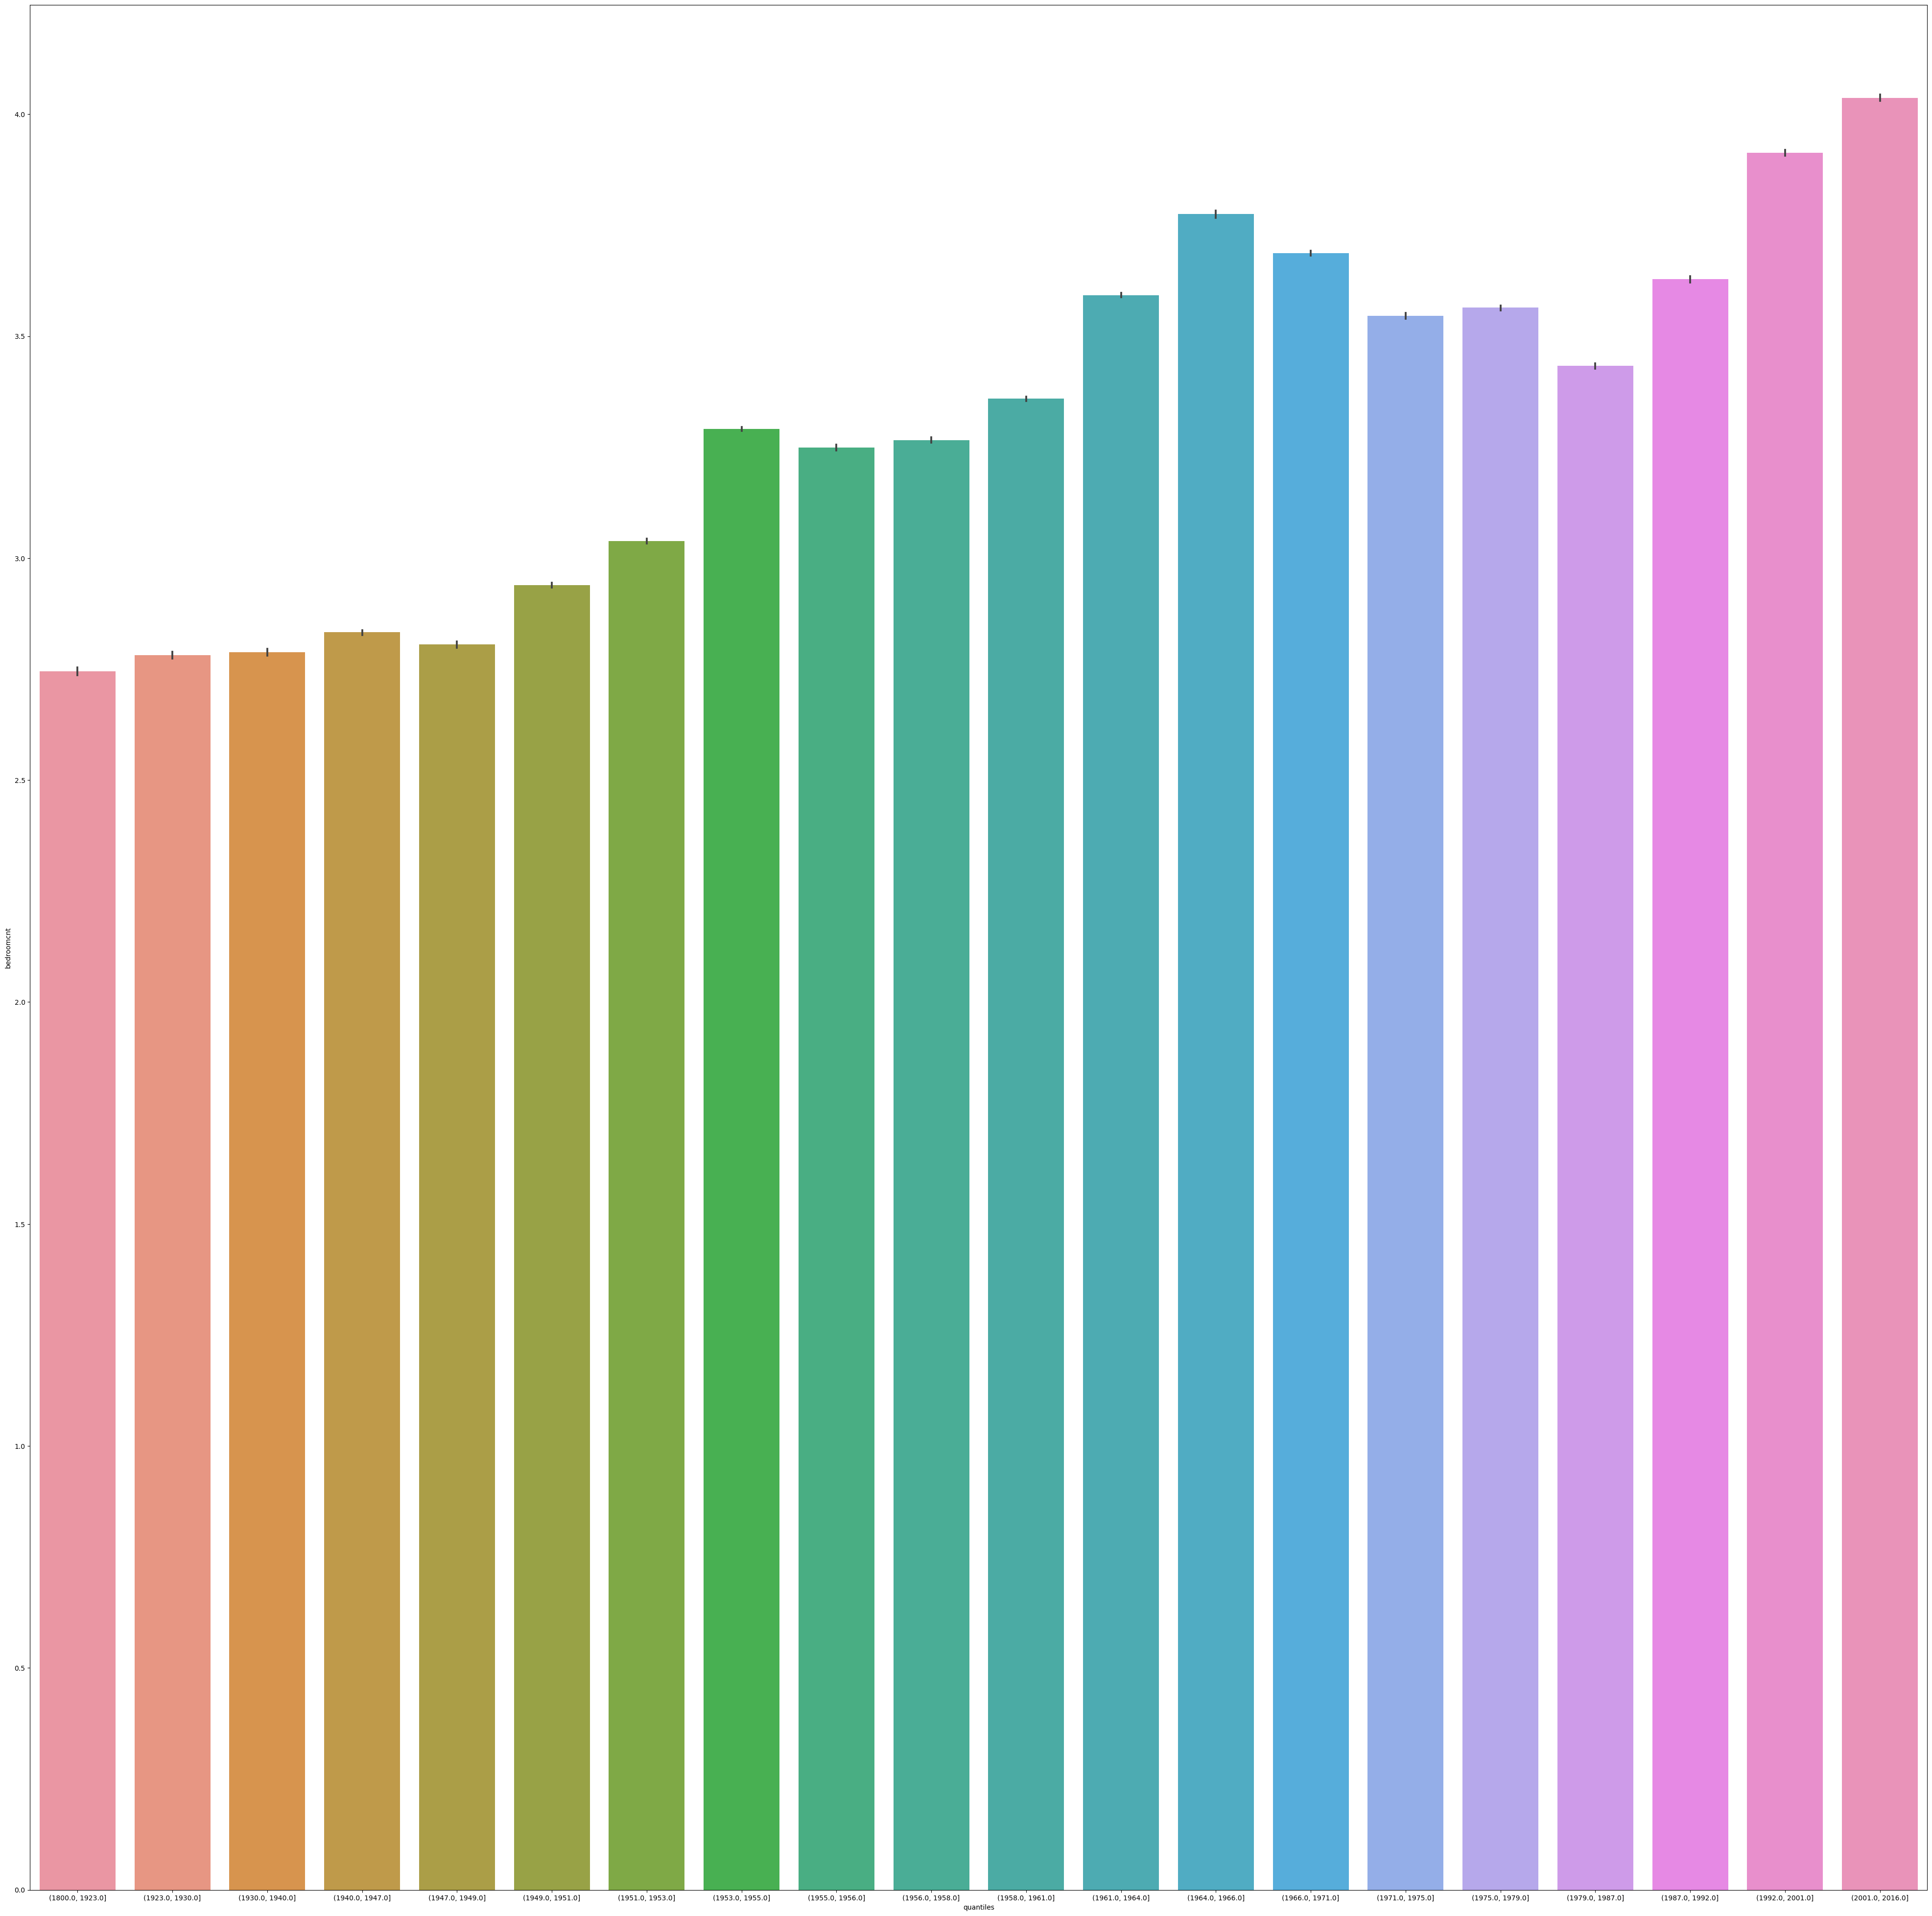

In [40]:
# Test Bar Plot - Year Built - Bins
sns.barplot(x='quantiles', y='bedroomcnt', data=train)
plt.rcParams["figure.figsize"] = (50,50)
plt.show()

# sns.barplot(x='bedroomcnt', y='taxamount', data=train)
plt.rcParams["figure.figsize"] = (10,8)
plt.show

### 9.
### Run the appropriate statistical tests where needed?

### 10.
### What independent variables are correlated with the dependent variable, home value?

In [33]:
train.columns

Index(['Unnamed: 0', 'bedroomcnt', 'bathroomcnt',
       'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount', 'fips', 'propertylandusedesc'],
      dtype='object')

In [15]:
train['taxvaluedollarcnt'].head(1)

785772    605000.0
Name: taxvaluedollarcnt, dtype: float64

In [24]:
test=train.drop(columns=['Unnamed: 0','propertylandusedesc',])

In [25]:
test_corr = test.corr()

In [26]:
test_corr

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
bedroomcnt,1.000000,0.642356,0.436145,0.255698,0.376121,0.256491
bathroomcnt,0.642356,1.000000,0.601911,0.500540,0.509551,0.500296
calculatedfinishedsquarefeet,0.436145,0.601911,1.000000,0.441617,0.316666,0.439468
taxvaluedollarcnt,0.255698,0.500540,0.441617,1.000000,0.190167,0.990724
yearbuilt,0.376121,0.509551,0.316666,0.190167,1.000000,0.191355
taxamount,0.256491,0.500296,0.439468,0.990724,0.191355,1.000000


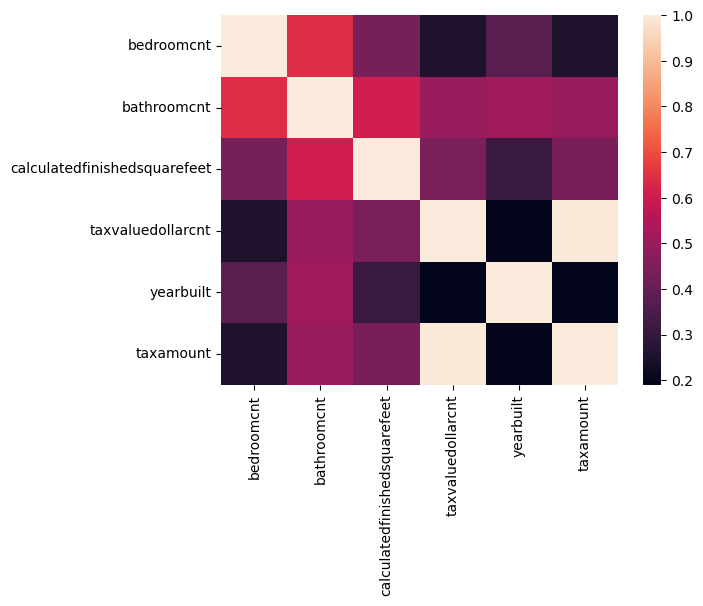

In [32]:
sns.heatmap(test_corr)
plt.show()

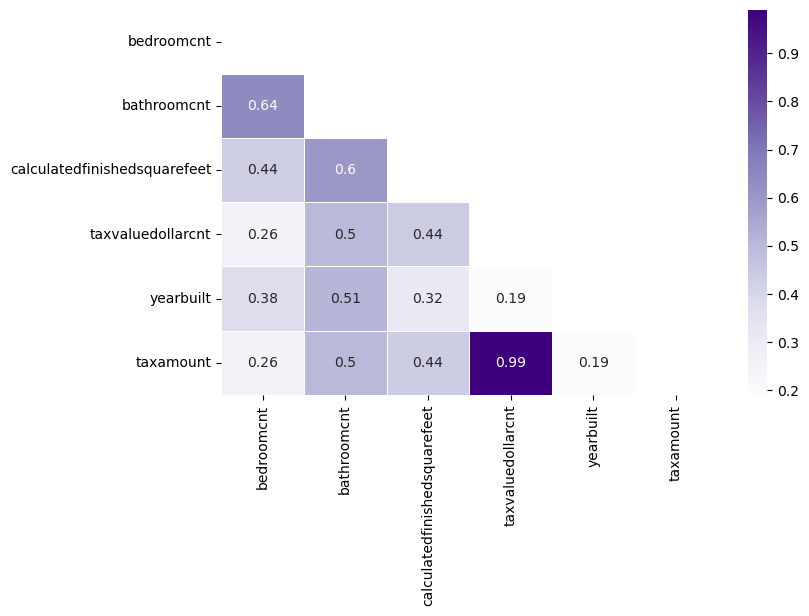

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(test_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(test_corr))

plt.show()

### 11.
### Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### Come up with some initial hypotheses based on your goal of predicting property value.

In [ ]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)